In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

16.633133730782404 75.75875713656288
87.16379568849212 -42.842275116944705
-58.69068618754001 -71.59296824903886
-48.711924604145416 6.025049224100343
-58.31702438884329 163.22421002457452
72.30045561055329 28.050188409743072
75.47091651994654 103.66362761671053
-65.00452411637701 145.80197066415184
-28.479892660644985 123.83404588194207
17.579153877264247 45.88291337513891
-58.94711960163486 164.98996112945946
35.009344173752126 -53.57279850419273
20.64841784293013 -127.22195228148655
67.54625165210388 -95.72109832680405
0.06806806276024702 -98.75561936970409
-27.842294346354358 158.29788401383178
70.75726056846125 26.831106490489987
-37.36577694172304 53.88200567215833
86.46023960206637 113.07968264436818
-54.570126555287096 169.38367462817303
46.921103677178394 152.61671951314872
76.84087921201368 -18.894385261813852
72.98510043752688 -54.378151786279986
-85.55331737334413 141.60660861383343
-81.45654971047908 18.526241294819954
-1.8922101846457196 -105.78462994836947
32.06053306778

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bijapur
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | mehamn
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | najran
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | san quintin
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | byron bay
Processing Record 16 of Set 1 | kjollefjord
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | vostok
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | bani walid
Processing Record 23 of Set 1 | 

In [11]:
len(city_data  )

573

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bijapur,16.8333,75.7000,69.35,41,1,10.22,IN,2022-11-29 19:50:42
1,Upernavik,72.7868,-56.1549,4.15,94,100,14.16,GL,2022-11-29 19:50:42
2,Ushuaia,-54.8000,-68.3000,49.62,66,75,26.46,AR,2022-11-29 19:50:43
3,Cape Town,-33.9258,18.4232,67.87,84,0,9.22,ZA,2022-11-29 19:47:08
4,Bluff,-46.6000,168.3333,59.81,78,100,9.69,NZ,2022-11-29 19:50:43
5,Mehamn,71.0357,27.8492,33.71,82,97,15.90,NO,2022-11-29 19:50:43
6,Khatanga,71.9667,102.5000,3.67,93,100,10.89,RU,2022-11-29 19:50:43
7,Hobart,-42.8794,147.3294,56.23,72,40,8.05,AU,2022-11-29 19:50:44
8,Esperance,-33.8667,121.9000,61.16,71,8,17.85,AU,2022-11-29 19:46:16
9,Najran,17.4924,44.1277,65.05,37,0,1.10,SA,2022-11-29 19:50:44


In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
today = time.strftime("%x")
today

'11/29/22'

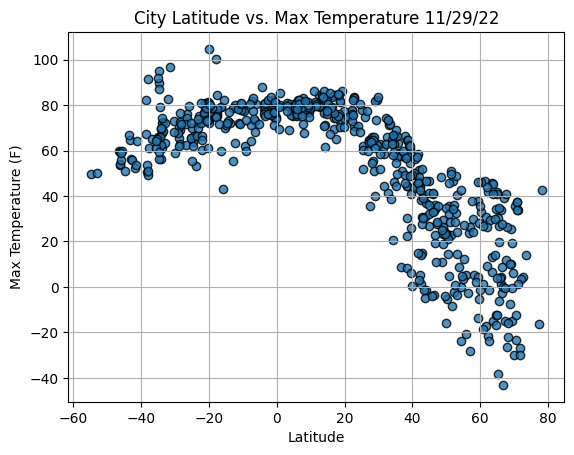

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

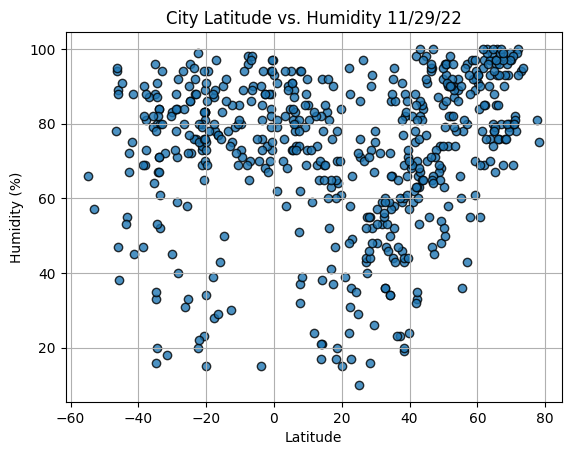

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

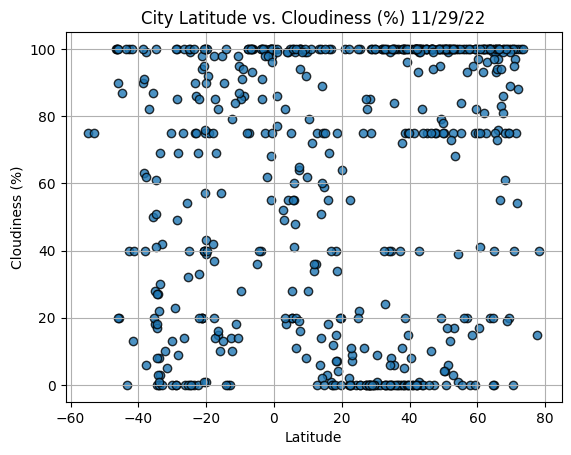

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

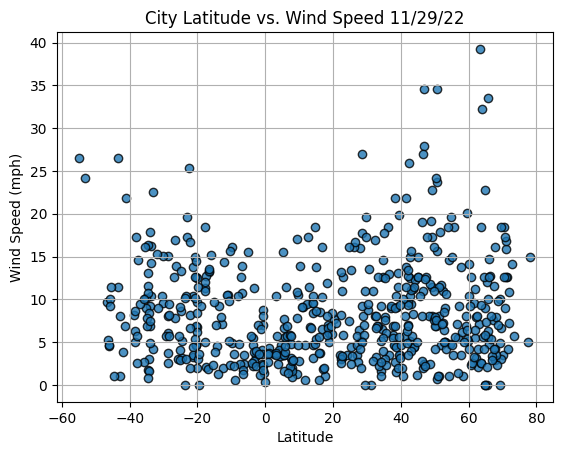

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()